<a href="https://colab.research.google.com/github/bobbykawade/Graph-Algorithm-for-Social-Media-Network-Analysis/blob/main/Graph_Algorithms_Social_Media_Network_Analysis_Using%20Networkkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this article, I will take you through the implementation of Graph Algorithms with Python. As a data scientist, you should be well aware to find relationships among people by using the network they create within each other. So here I will take you through the Graph Algorithms you should know for Data Science using Python.


# What are Graph Algorithms?
As machine learning practitioners, we have become quite comfortable with Pandas or SQL or any relational database. We are used to seeing our users in rows with their attributes in columns. But does the real world behave this way?

In a connected world, users cannot be seen as independent entities. They have certain relationships with each other and sometimes we would like to include such relationships when building our machine learning models.

Now, while in a relational database we cannot use such relationships between different users, in a graph database it is quite trivial to do so. In this article, I’m going to talk about some of the most important graphics algorithms you should know about and how to implement them using Python.

# Graph Algorithms: Connected Components
Connected Components
You can think of connected components in very simple terms as a kind of hard clustering algorithm that finds clusters in connected data.

As a concrete example: let’s say you have data on the roads connecting two cities in the world. And you have to find out all the continents of the world and what city they contain.

The algorithm of connected components that we use to do this is based on a special case of BFS / DFS. I won’t talk much about how it works here, but we’ll see how to get the code to work with Networkx.

I will be using the Networkx module in Python to build and analyze our graphical algorithms. Let’s start with an example chart that we use for our purpose. Contains cities and distance information between them.

I’ll start by creating a list of edges with the distances that I’ll add as the edge weight:

In [ ]:
edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], 
['Erfurt', 'Wurzburg', 186], ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], 
['Munchen', 'Kassel', 502], ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], 
['Numberg', 'Munchen', 167], ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], 
['Augsburg', 'Karlsruhe', 250], ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], 
['Frankfurt', 'Mannheim', 85], ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173], 
['Wurzburg', 'Numberg', 103], ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217], 
['Karlsruhe', 'Mannheim', 80], ['Karlsruhe', 'Augsburg', 250],["Mumbai", "Delhi",400],
["Delhi", "Kolkata",500],["Kolkata", "Bangalore",600],["TX", "NY",1200],["ALB", "NY",800]]

In [ ]:
import networkx as nx

In [ ]:
#We will create a graph
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])

 We now want to discover the different continents and their cities from this graphic. We can now do this using the algorithm of connected components like:

In [ ]:
for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)

cc0: {'Erfurt', 'Wurzburg', 'Mannheim', 'Munchen', 'Karlsruhe', 'Numberg', 'Frankfurt', 'Stuttgart', 'Kassel', 'Augsburg'}
cc1: {'Bangalore', 'Delhi', 'Kolkata', 'Mumbai'}
cc2: {'NY', 'TX', 'ALB'}


So we can find distinct network components in our data by using edges and vertices. This graph algorithm can be used on different datasets to satisfy any use case as above.

# Graph Algorithms: Shortest Path
Continuing with the above example only, we are given a graph with the cities of Germany and their respective distances. You want to know how to get from Frankfurt (the starting node) to Munich by covering the shortest distance.

Applying the shortest route in graphical algorithms is used in Google Maps to find the shortest route. Let’s say you are in a Walmart store. You have different aisles and the distance between all the aisles. You want to offer the customer the shortest route between aisle A and aisle D.

In [ ]:
print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


In [ ]:
# To find the shortest path between all the pairs we can simply use a for loop

for x in nx.all_pairs_dijkstra_path(g,weight='weight'):
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

# Graph Algorithms: Pagerank

It’s the page sorting algorithm that has fueled Google for a long time. It assigns scores to pages based on the number and quality of inbound and outbound links.


The Pagerank can be used anywhere we want to estimate the importance of nodes in any network. Here I am going to use Facebook data. We have an edge/link file between Facebook users. Let’s first create the FB graph using:

https://www.kaggle.com/roshansharma/facebook-social-network-analysis/data?select=facebook-combined.txt

In [ ]:
fb = nx.read_edgelist('facebook-combined.txt', create_using = nx.Graph(), nodetype = int)

The Pagerank can be used anywhere we want to estimate the importance of nodes in any network. Here I am going to use Facebook data. We have an edge/link file between Facebook users. Let’s first create the FB graph using:

# Now let’s create the graph:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

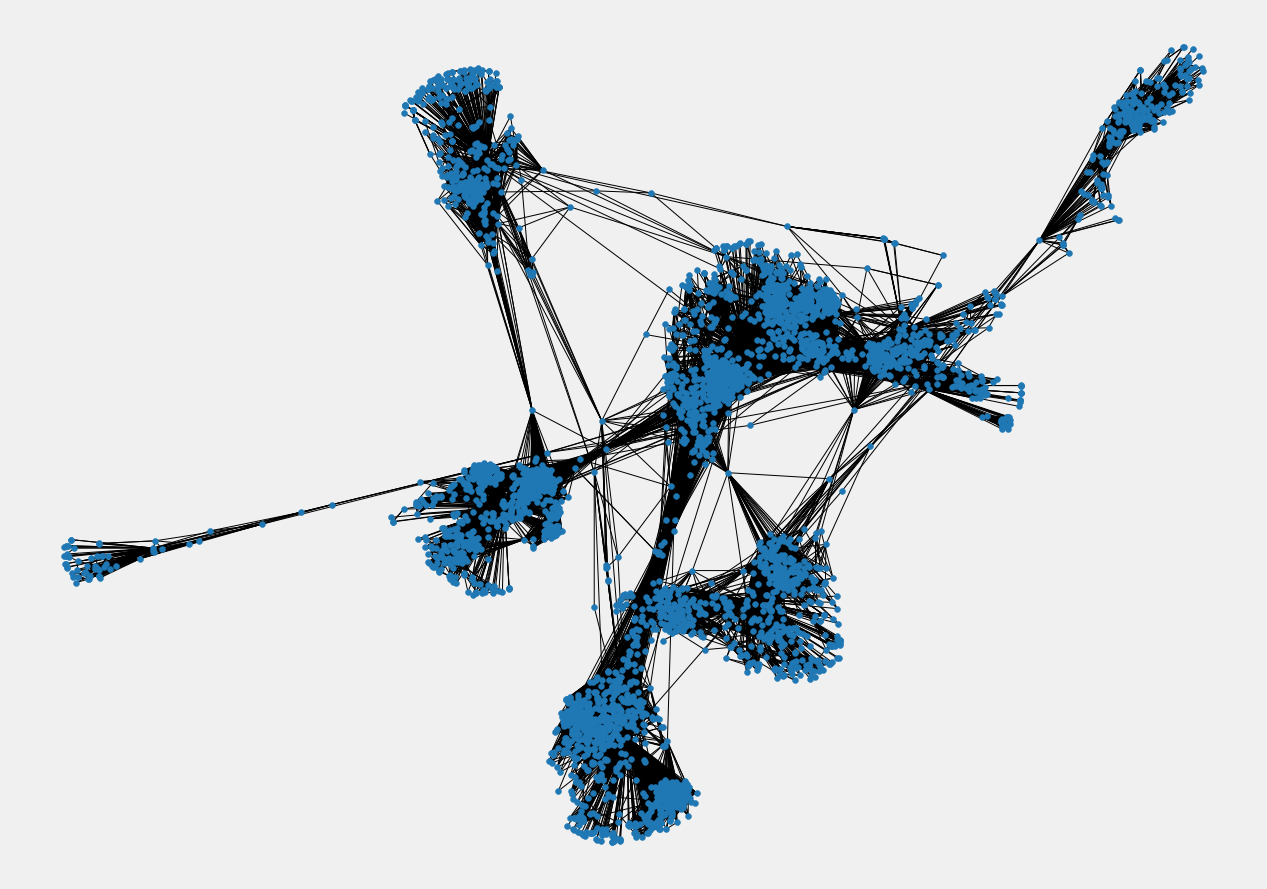

In [ ]:
pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [ ]:
# Let us compute the page rank for all the nodes.
pageranks = nx.pagerank(fb)

print(pageranks)

{0: 0.006289602618466542, 1: 0.00023590202311540972, 2: 0.00020310565091694562, 3: 0.00022552359869430617, 4: 0.00023849264701222462, 5: 0.00020234812068977806, 6: 0.0001800186713563964, 7: 0.00026267667111515796, 8: 0.00023737300152657913, 9: 0.0006001572433028073, 10: 0.00013504865958890368, 11: 5.2591423276218314e-05, 12: 5.2591423276218314e-05, 13: 0.0003306419576230765, 14: 0.0002886439803414604, 15: 5.2591423276218314e-05, 16: 0.0001332430576919805, 17: 0.00026000987429524483, 18: 5.2591423276218314e-05, 19: 0.0003806431405636216, 20: 0.00029297537600066995, 21: 0.0006928319433106632, 22: 0.00016385672869526863, 23: 0.00040432634048828404, 24: 0.00022824011209266322, 25: 0.000800412660519768, 26: 0.0006922746319436039, 27: 9.900477693053426e-05, 28: 0.0002552192093758929, 29: 0.00019154955480122377, 30: 0.00021219645131216383, 31: 0.0002993619581806596, 32: 0.0001478893714943048, 33: 9.172093610965164e-05, 34: 9.248443396698941e-05, 35: 7.353643512923525e-05, 36: 0.00018502677914

In [ ]:
# Let us now order the page rank results

import operator

sorted_pagerank = sorted(pageranks.items(), 

key=operator.itemgetter(1),reverse = True)

print(sorted_pagerank)

[(3437, 0.007614586844749603), (107, 0.006936420955866114), (1684, 0.0063671621383068295), (0, 0.006289602618466542), (1912, 0.0038769716008844974), (348, 0.0023480969727805783), (686, 0.0022193592598000193), (3980, 0.002170323579009993), (414, 0.0018002990470702262), (698, 0.0013171153138368807), (483, 0.0012974283300616082), (3830, 0.0011844348977671688), (376, 0.0009014073664792464), (2047, 0.000841029154597401), (56, 0.0008039024292749443), (25, 0.000800412660519768), (828, 0.0007886905420662135), (322, 0.0007867992190291396), (475, 0.0007853586142469624), (428, 0.0007800171933479684), (67, 0.0007724556453836683), (3596, 0.0007657185486816217), (2313, 0.0007541077515661327), (713, 0.0007493481050218991), (271, 0.0007457889296014823), (563, 0.0007402839803830178), (917, 0.0007331559412352088), (119, 0.000731907259320906), (3545, 0.0007271573982528102), (3938, 0.0007266014687561135), (277, 0.0007191102550992672), (1888, 0.0007117172673725058), (1800, 0.0006984646532952207), (3604, 0.

In [ ]:
# Create a subgraph with more influential users.

first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []

In [ ]:
for x in first_degree_connected_nodes:

    second_degree_connected_nodes+=list(fb.neighbors(x)) 

second_degree_connected_nodes.remove(3437) 
second_degree_connected_nodes = list(set(second_degree_connected_nodes))

subgraph_3437 = nx.subgraph(fb, first_degree_connected_nodes + second_degree_connected_nodes)

pos = nx.spring_layout(subgraph_3437)

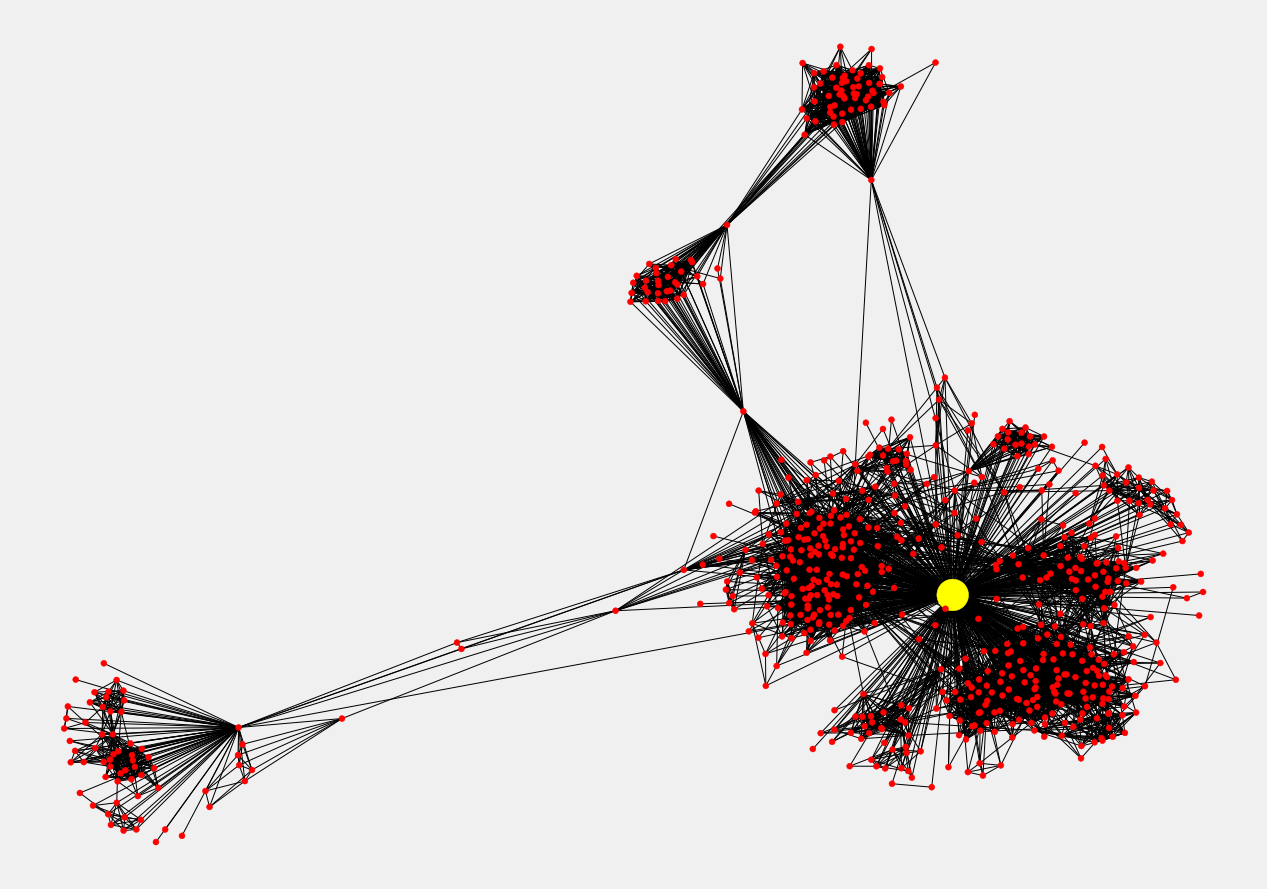

In [ ]:
# And we visualise the most influential users painting them in yellow :

node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]

node_size = [1000 if v == 3437 else 35 for v in subgraph_3437] 

plt.style.use('fivethirtyeight') 

plt.rcParams['figure.figsize'] = (20, 15)

plt.axis('off')

nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )

plt.show()

# Graph Algorithms: Centrality Measures

Centrality measures
Betweenness centrality quanties how many times a particular node
comes in the shortest chosen path between two other nodes.

Degree Centrality: It is simply the number of connections for a node.

Here is the code for finding the Betweenness centrality for the subgraph.


There are many metrics of centrality that you can use as functionality for your machine learning models. I’ll talk about two of them:

Centrality between the two: It is not only the users who have the most friends that are important, the users who connect one geography to another are also important because it allows users to see content from various geographies. The centrality of the in-between quantifies the number of times a particular node arrives in the shortest path chosen between two other nodes.
Degree of centrality: this is simply the number of connections for a node.
The centrality measures can be used as a feature in machine learning models:

(-0.4176564678549767,
 0.6521081492304802,
 -0.7037524878978729,
 1.0811310708522797)

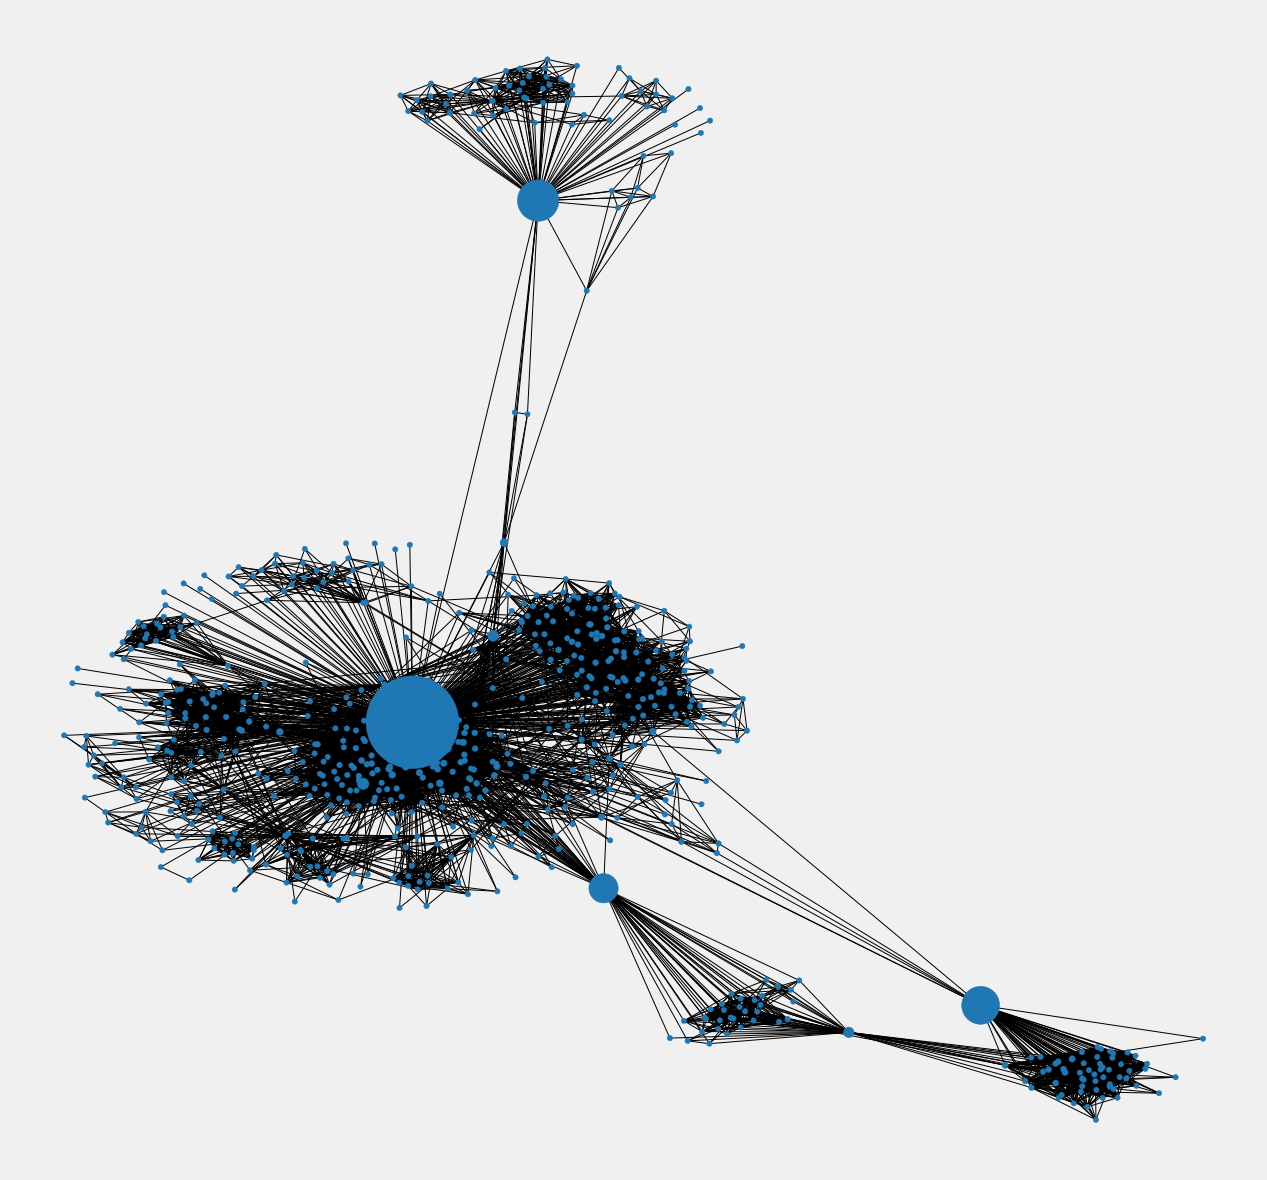

In [ ]:
pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

You can see the nodes sized based on their centrality values between the two here. They can be considered as information brokers. Breaking one of the nodes with high centrality between the two will split the graph into several parts.

http://vargas-solar.com/data-centric-smart-everything/network-analysis/

https://thecleverprogrammer.com/2020/10/09/graph-algorithms-with-python/